In [ ]:

import numpy as np
import pandas as pd
import io
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from numpy import unique
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline, Pipeline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn import svm
from sklearn import preprocessing
from numpy import array
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from scipy.stats import shapiro






pd.options.display.max_columns = None
from google.colab import files
uploaded = files.upload()




Saving fighters.csv to fighters (3).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded["fighters.csv"]))
df.head()

,name,wins,looses,draws,ko_rate,stance,age,height,reach,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,5.74 ft (1.75 m),70.47 inches (179 cm),Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Unknown,Unknown,Germany


DROP THE COLUMN "COUNTRY" 

In [ ]:
df.drop('country',inplace=True,axis=1)


 REPLACE THE "UNKNOWN" WITH 0  IN THE ENTIRETY OF THE DATASET AND WE CLEAN SOME COLUMNS


In [ ]:
df=df.replace('Unknown','0')
df['ko_rate'] = df['ko_rate'].str.replace('%', ' ')

columns_to_convert = ['wins', 'looses', 'draws', 'ko_rate', 'age']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df[columns_to_convert] = df[columns_to_convert].fillna(0.0)
df[columns_to_convert] = df[columns_to_convert].astype(float)


FROM THE "HEIGHT" THE METERS ARE EXTRACTED

In [ ]:
def extract_meters(s):
    if s == '0':
        return 0.0
    else:
        try:
            start = s.index("(") + 1
            end = s.index(" m)")
            return float(s[start:end].strip())
        except ValueError:
            return None

df['height'] = df['height'].apply(extract_meters)


FROM THE "REACH"  THE CENTIMETERS ARE EXTRACTED

In [ ]:
def extract_centimeters(s):
 if s == "0":
  return 0.0
 else:
  start = s.find("(") + 1
  end = s.find(" ", start)
  cm = float(s[start:end])
  return cm
df["reach"] = df["reach"].apply(extract_centimeters)




 THE "STANCE" IS ENCODED

In [ ]:
df1=pd.get_dummies(df,columns=['stance'],drop_first=True)


In [ ]:
df1

,name,wins,looses,draws,ko_rate,age,height,reach,stance_Orthodox,stance_Southpaw
0,Azizbek Abdumuxtar Abdugofurov,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
1,Franco Fernando Altamiranda,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
2,Joaquin Saul Alvarez,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
3,Saul Alvarez,54.0,1.0,2.0,63.2,32.0,1.75,179.0,1,0
4,Sukru Altay,0.0,0.0,0.0,0.0,38.0,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8.0,1.0,0.0,50.0,28.0,1.75,0.0,1,0
2756,arthur abraham,47.0,6.0,0.0,56.6,42.0,1.75,183.0,1,0
2757,victor abraham,24.0,15.0,0.0,20.5,66.0,1.74,178.0,1,0
2758,reiya abe,16.0,2.0,1.0,42.1,29.0,0.00,0.0,0,1


BOXPLOT OF COLUMN AGE

221.0

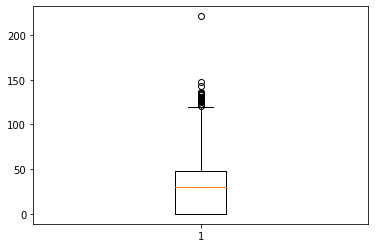

In [ ]:
data=df1['age']
plt.boxplot(data)
data.max()

THE AGES THAT ARE OVER 60 ARE REPLACED WITH THE MEAN OF THE REST OF THE AGES




In [ ]:
k = df1['age']
S_age = k[(k <= 60.0) & (k > 0.0)].sum()
C_age = k[(k <= 60.0) & (k > 0.0)].count()

MEAN_AGE=S_age/C_age
MEAN_AGE=round(MEAN_AGE,1)
df1['age'] = df1['age'].apply(lambda x: MEAN_AGE if x >= 60 else x)
df1['age'] = df1['age'].apply(lambda x: MEAN_AGE if x <= 10 else x)
df1

,name,wins,looses,draws,ko_rate,age,height,reach,stance_Orthodox,stance_Southpaw
0,Azizbek Abdumuxtar Abdugofurov,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0
1,Franco Fernando Altamiranda,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0
2,Joaquin Saul Alvarez,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0
3,Saul Alvarez,54.0,1.0,2.0,63.2,32.0,1.75,179.0,1,0
4,Sukru Altay,0.0,0.0,0.0,0.0,38.0,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8.0,1.0,0.0,50.0,28.0,1.75,0.0,1,0
2756,arthur abraham,47.0,6.0,0.0,56.6,42.0,1.75,183.0,1,0
2757,victor abraham,24.0,15.0,0.0,20.5,36.1,1.74,178.0,1,0
2758,reiya abe,16.0,2.0,1.0,42.1,29.0,0.00,0.0,0,1


In [ ]:
k = df1['height']
S_age = k[ k > 0.0].sum()
C_age = k[k > 0.0].count()

MEAN_AGE=S_age/C_age
MEAN_AGE=round(MEAN_AGE,1)

df1['height'] = df1['height'].apply(lambda x: MEAN_AGE if x == 0.00 else x)


In [ ]:
k = df1['reach']
S_age = k[ k > 0.0].sum()
C_age = k[k > 0.0].count()

MEAN_AGE=S_age/C_age
MEAN_AGE=round(MEAN_AGE,1)

df1['reach'] = df1['reach'].apply(lambda x: MEAN_AGE if x == 0 else x)

In [ ]:
df1

,name,wins,looses,draws,ko_rate,age,height,reach,stance_Orthodox,stance_Southpaw
0,Azizbek Abdumuxtar Abdugofurov,0.0,0.0,0.0,0.0,36.1,1.80,182.1,1,0
1,Franco Fernando Altamiranda,0.0,0.0,0.0,0.0,36.1,1.80,182.1,1,0
2,Joaquin Saul Alvarez,0.0,0.0,0.0,0.0,36.1,1.80,182.1,1,0
3,Saul Alvarez,54.0,1.0,2.0,63.2,32.0,1.75,179.0,1,0
4,Sukru Altay,0.0,0.0,0.0,0.0,38.0,1.80,182.1,1,0
...,...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8.0,1.0,0.0,50.0,28.0,1.75,182.1,1,0
2756,arthur abraham,47.0,6.0,0.0,56.6,42.0,1.75,183.0,1,0
2757,victor abraham,24.0,15.0,0.0,20.5,36.1,1.74,178.0,1,0
2758,reiya abe,16.0,2.0,1.0,42.1,29.0,1.80,182.1,0,1


SOME PLOTS

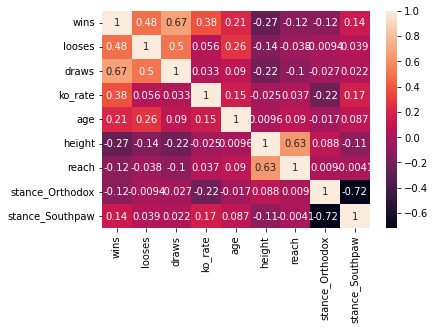

In [ ]:
corr_matrix=df1.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
'''sn.barplot(x = df1['stance_Orthodox'], y = df1['wins'])
plt.xticks(rotation = 90)
plt.show()'''

"sn.barplot(x = df1['stance_Orthodox'], y = df1['wins'])\nplt.xticks(rotation = 90)\nplt.show()"

In [ ]:
'''sn.barplot(x = df1['stance_Southpaw'], y = df1['wins'])
plt.xticks(rotation = 90)
plt.show()'''

"sn.barplot(x = df1['stance_Southpaw'], y = df1['wins'])\nplt.xticks(rotation = 90)\nplt.show()"

 A NEW COLUMN WITH THE LAST NAMES OF THE PLAYERS IS CREATED

In [ ]:
def extract_last_name(name):
    if ' JR' in name.upper():
        name = name[:-3]
    return name.split()[-1]
df1['last_name'] = df1['name'].apply(extract_last_name)
df1['last_name'] = df1['last_name'].str.upper()



In [ ]:


from google.colab import files
uploaded = files.upload()

Saving popular_matches.csv to popular_matches (2).csv


In [ ]:
popular_matches = pd.read_csv(io.BytesIO(uploaded["popular_matches.csv"]))


In [ ]:
popular_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        152 non-null    object 
 1   place                                       152 non-null    object 
 2   opponent_1                                  152 non-null    object 
 3   opponent_2                                  152 non-null    object 
 4   opponent_1_estimated_punch_power            152 non-null    int64  
 5   opponent_2_estimated_punch_power            152 non-null    int64  
 6   opponent_1_estimated_punch_resistance       150 non-null    float64
 7   opponent_2_estimated_punch_resistance       144 non-null    float64
 8   opponent_1_estimated_ability_to_take_punch  151 non-null    float64
 9   opponent_2_estimated_ability_to_take_punch  145 non-null    float64
 10  opponent_1_rou

 COLUMNS "DATE"  AND "PLACE" ARE REMOVED  AS THEY DO NOT PLAY A ROLE IN THE  PREDICTIONS




In [ ]:
popular_matches=popular_matches.drop(columns=['date','place'])

REPLACE THE MISSING VALUES WITH THE MEAN OF THE REST

In [ ]:
popular_matches['opponent_1'] = popular_matches['opponent_1'].str.upper()
popular_matches['opponent_2'] = popular_matches['opponent_2'].str.upper()



list2=[ 'opponent_1_estimated_punch_power',
        'opponent_2_estimated_punch_power',
        'opponent_1_estimated_punch_resistance',
        'opponent_2_estimated_punch_resistance',
        'opponent_1_estimated_ability_to_take_punch',
        'opponent_2_estimated_ability_to_take_punch', 'opponent_1_rounds_boxed',
        'opponent_2_rounds_boxed', 'opponent_1_round_ko_percentage',
        'opponent_2_round_ko_percentage', 'opponent_1_has_been_ko_percentage',
        'opponent_2_has_been_ko_percentage', 'opponent_1_avg_weight',
        'opponent_2_avg_weight' ]


for i in list2 : 
  mean_value=popular_matches[i].mean()
  popular_matches.fillna(value=round(mean_value,2), inplace=True)
popular_matches[['opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power', 'opponent_1_rounds_boxed']] = popular_matches[['opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power', 'opponent_1_rounds_boxed']].astype(float)


CREATE COLUMNS WITH THE LAST NAMES OF THE ATHLETES

In [ ]:

popular_matches['last_name_1'] = popular_matches['opponent_1'].apply(extract_last_name)
popular_matches['last_name_2'] = popular_matches['opponent_2'].apply(extract_last_name)

FIND THE WINNER 

In [ ]:
matrix =popular_matches['verdict']


j=0
k=0
for i in matrix :
  
  all_words = i.split()
  first_word= all_words[0]
  

  matrix[j]=first_word
  j=j+1

def take_the_opponents():
    list_name_1, list_name_2 = [], []
    for i in range(popular_matches.shape[0]):
        name_opponent_12 = popular_matches['last_name_1'][i]
        name_opponent_23 = popular_matches['last_name_2'][i]

        list_name_1.append(name_opponent_12)
        list_name_2.append(name_opponent_23)
    
    return list_name_1, list_name_2

list_name_opponent_12, list_name_opponent_23 = take_the_opponents()

<ipython-input-90-7b4ae214fa5d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix[j]=first_word


CREATE THE NEW COLUMNS THAT WILL BE A PART OF THE FINAL DATASET

In [ ]:


list_columns_1_str = ['wins_1', 'looses_1', 'draws_1', 'ko_rate_1', 'age_1','height_1', 'reach_1', 'stance_Orthodox_1', 'stance_Southpaw_1']

list_columns_2_str = ['wins_2', 'looses_2', 'draws_2', 'ko_rate_2', 'age_2','height_2', 'reach_2', 'stance_Orthodox_2', 'stance_Southpaw_2']

list_columns_1_str
    
   

['wins_1',
 'looses_1',
 'draws_1',
 'ko_rate_1',
 'age_1',
 'height_1',
 'reach_1',
 'stance_Orthodox_1',
 'stance_Southpaw_1']

CONNECTION OF THE DATASETS

In [ ]:


def features_1(name):
    row = df1.loc[df1['last_name'] ==name]
    row_values = row[row.columns].values

    if row_values.shape[0] == 1:
        return row_values[0][1:]
    else:
        return np.zeros(9, dtype=float)
def full_DATA():
    columns_1 = [features_1(name) for name in list_name_opponent_12]
    columns_2 = [features_1(name) for name in list_name_opponent_23]
    
    for i in range(len(list_columns_1_str)):
        popular_matches[list_columns_1_str[i]] = [col[i] for col in columns_1]
    
    for i in range(len(list_columns_2_str)):
        popular_matches[list_columns_2_str[i]] = [col[i] for col in columns_2]
    
    return popular_matches
df1_and_pm=full_DATA()
df1_and_pm    



,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict,last_name_1,last_name_2,wins_1,looses_1,draws_1,ko_rate_1,age_1,height_1,reach_1,stance_Orthodox_1,stance_Southpaw_1,wins_2,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,stance_Orthodox_2,stance_Southpaw_2
0,VASYL LOMACHENKO,LUKE CAMPBELL,72.0,72.0,73.90,60.50,78.0,73.00,119.0,130.00,8.40,12.31,0.00,0.00,127.11,135.24,Lomachenko,LOMACHENKO,CAMPBELL,14.0,2.0,0.0,62.5,34.0,1.68,166.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,ORLANDO FIORDIGIGLIO,SAM EGGINGTON,59.0,59.0,55.40,54.50,68.0,66.00,200.0,177.00,6.50,8.47,3.03,6.25,152.50,148.93,Eggington,FIORDIGIGLIO,EGGINGTON,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,28.0,7.0,0.0,48.6,28.0,1.80,182.1,1.0,0.0
2,GENNADY GOLOVKIN,SERGIY DEREVYANCHENKO,82.0,82.0,68.00,63.30,84.0,75.00,200.0,81.00,17.50,12.35,0.00,0.00,159.66,164.04,Golovkin,GOLOVKIN,DEREVYANCHENKO,41.0,1.0,1.0,83.7,40.0,1.79,178.0,1.0,0.0,13.0,2.0,0.0,66.7,36.0,1.70,171.0,1.0,0.0
3,CHAZZ WITHERSPOON,OLEKSANDR USYK,69.0,69.0,59.60,68.90,79.0,80.00,182.0,125.00,15.93,9.60,4.76,66.29,292.71,200.10,Usyk,WITHERSPOON,USYK,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.0,0.0,0.0,72.2,35.0,1.90,182.1,0.0,1.0
4,EBENEZER TETTEH,DANIEL DUBOIS,46.0,46.0,66.29,44.40,50.0,69.00,38.0,39.00,23.68,30.77,0.00,0.00,178.67,230.38,Dubois,TETTEH,DUBOIS,9.0,1.0,0.0,90.0,36.1,1.80,182.1,0.0,0.0,15.0,1.0,0.0,87.5,25.0,1.94,182.1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,THEOPHILUS TETTEH,ANTHONY FOWLER,56.0,56.0,41.70,45.70,67.0,60.00,147.0,65.00,6.12,13.85,8.00,66.29,154.88,155.90,Fowler,TETTEH,FOWLER,9.0,1.0,0.0,90.0,36.1,1.80,182.1,0.0,0.0,14.0,1.0,0.0,73.3,31.0,1.80,182.1,1.0,0.0
148,DEONTAY WILDER,TYSON FURY,88.0,88.0,63.90,66.90,83.0,86.00,143.0,186.00,28.67,10.75,0.00,0.00,242.40,247.50,Fury,WILDER,FURY,42.0,1.0,1.0,93.2,36.0,2.00,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
149,SCOTT QUIGG,JONO CARROLL,75.0,75.0,63.40,52.20,76.0,63.00,200.0,122.00,13.00,66.29,0.00,0.00,124.80,133.43,Carroll,QUIGG,CARROLL,35.0,3.0,2.0,65.0,33.0,1.73,182.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
150,JOE HUGHES,SAM MAXWELL,57.0,57.0,52.30,66.29,65.0,66.29,182.0,66.29,3.85,66.29,0.00,0.00,141.86,66.29,Maxwell,HUGHES,MAXWELL,16.0,4.0,2.0,8.7,32.0,1.80,182.1,0.0,1.0,0.0,0.0,0.0,0.0,36.1,1.80,182.1,1.0,0.0


THE NEW DATASET

In [ ]:
df1_and_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   opponent_1                                  152 non-null    object 
 1   opponent_2                                  152 non-null    object 
 2   opponent_1_estimated_punch_power            152 non-null    float64
 3   opponent_2_estimated_punch_power            152 non-null    float64
 4   opponent_1_estimated_punch_resistance       152 non-null    float64
 5   opponent_2_estimated_punch_resistance       152 non-null    float64
 6   opponent_1_estimated_ability_to_take_punch  152 non-null    float64
 7   opponent_2_estimated_ability_to_take_punch  152 non-null    float64
 8   opponent_1_rounds_boxed                     152 non-null    float64
 9   opponent_2_rounds_boxed                     152 non-null    float64
 10  opponent_1_rou

CREATE A HEATMAP

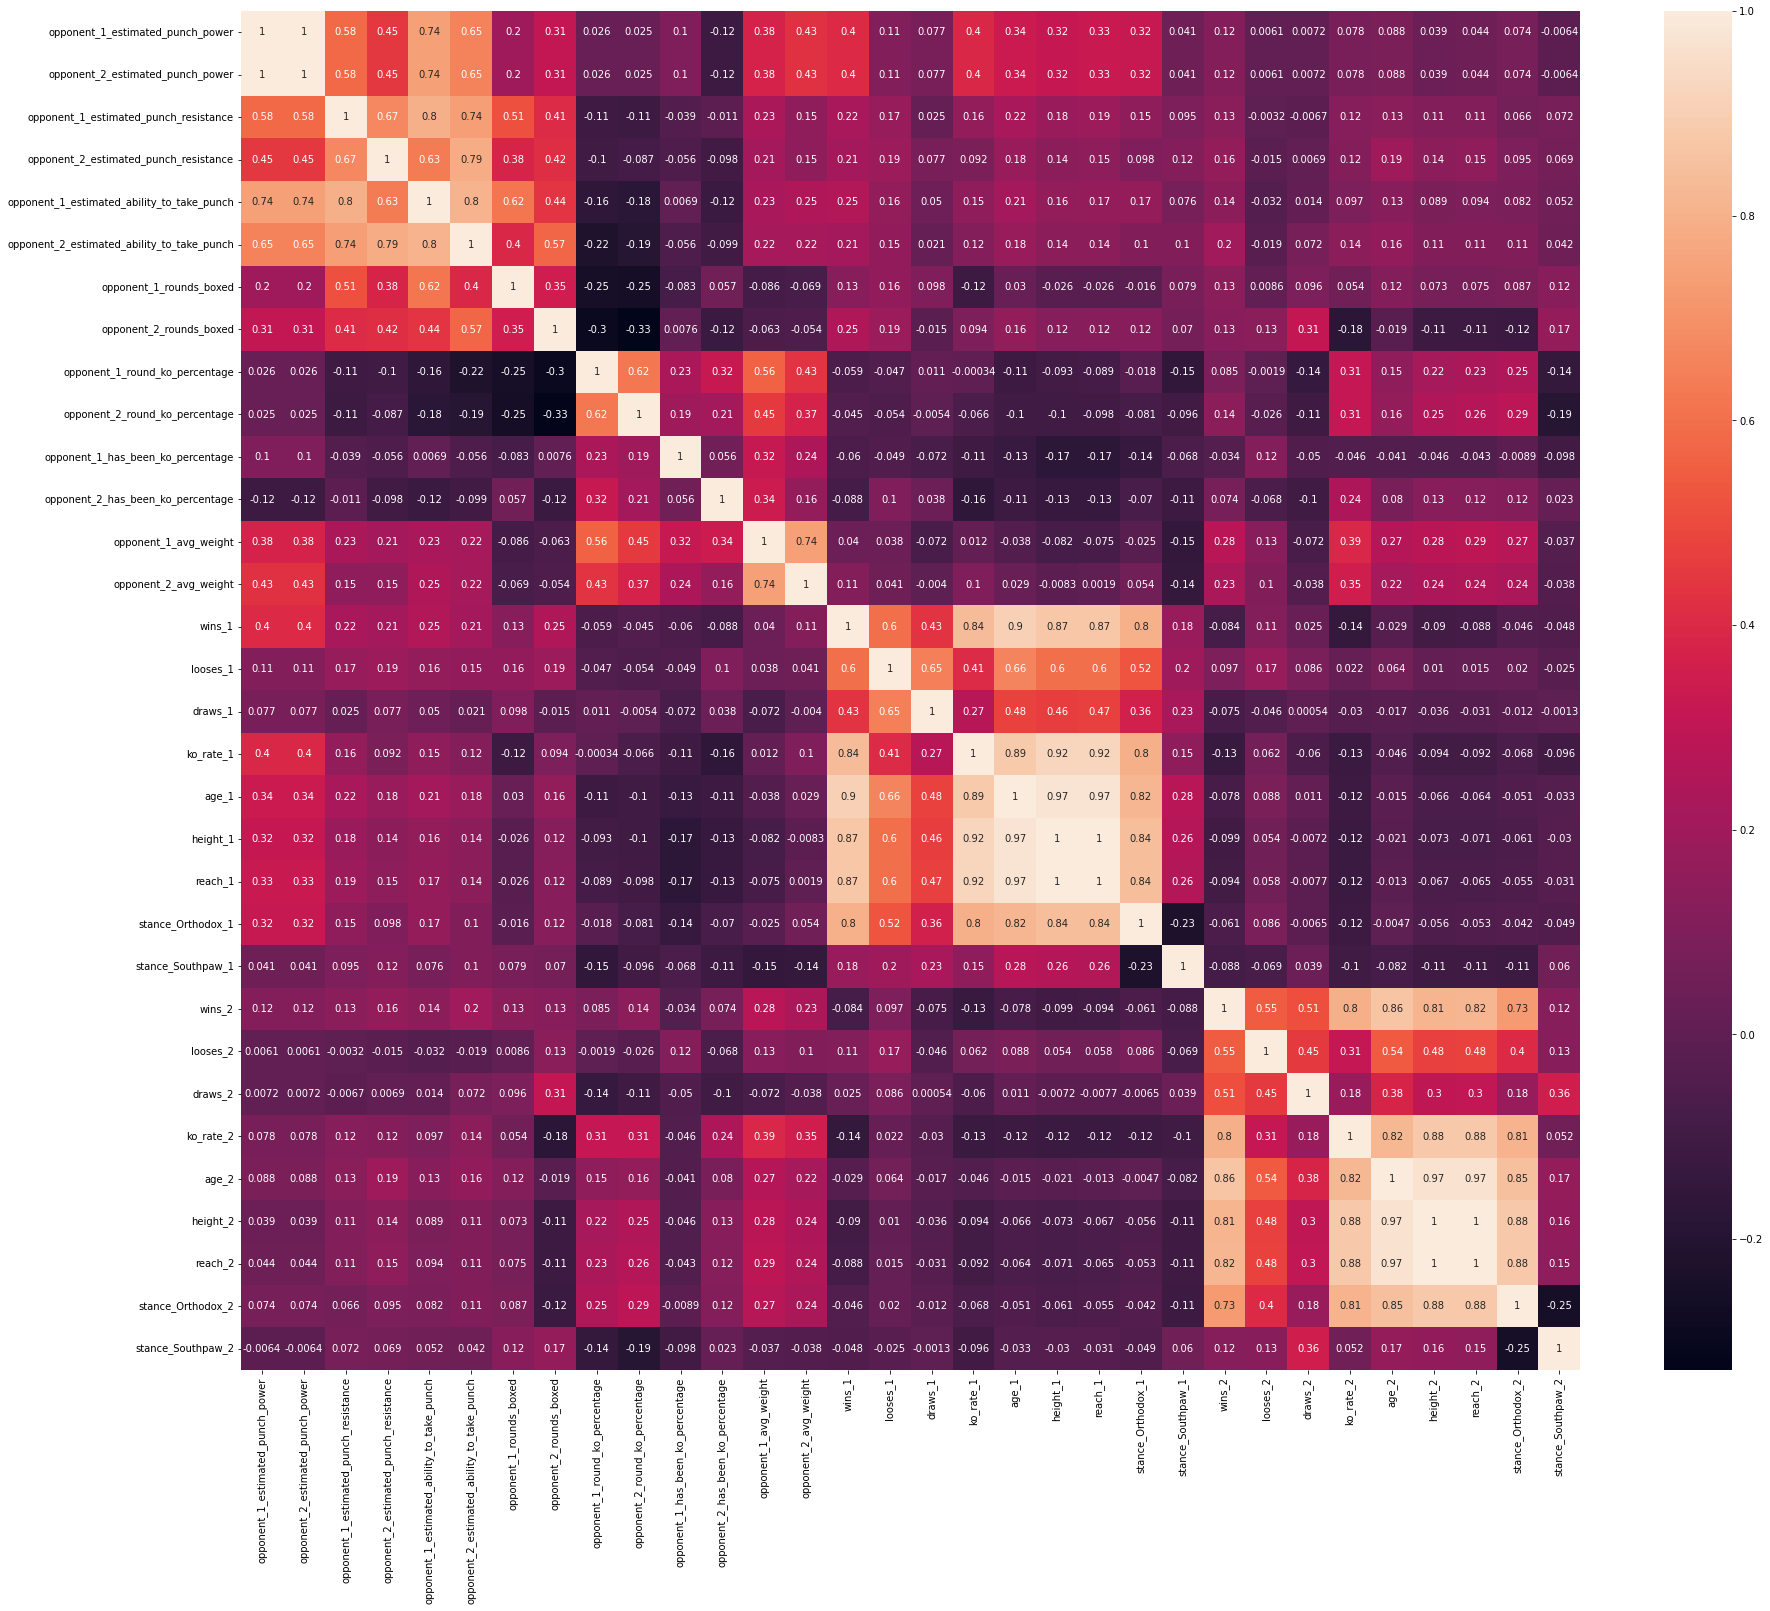

In [ ]:
correlations = df1_and_pm.corr()
plt.figure(figsize=(30,25))
sn.heatmap(correlations, annot=True)
plt.show()

In [ ]:
df1_and_pm['verdict'] = df1_and_pm['verdict'].str.upper()

FIND THE UNIQUE VALUES OF COLUMN VERDICT

In [ ]:



unique_values =df1_and_pm["verdict"].unique()

print(unique_values)


['LOMACHENKO' 'EGGINGTON' 'GOLOVKIN' 'USYK' 'DUBOIS' 'SPENCE' 'HANEY'
 'FURY' 'POVETKIN' 'BETERBIEV' 'TAYLOR' 'FITZGERALD' 'CHISORA' 'OLATUNJI'
 'DRAW' 'ALVAREZ' 'TYSON' 'ALI' 'LEONARD' 'MAYWEATHER' 'WILDER' 'JOSHUA'
 'RUIZ' 'SMITH' 'UNKNOWN' 'PERALTA' 'PARKER' 'LINARES' 'BELLEW' 'WARD'
 'CLEVERLY' 'PORTER' 'FRAMPTON' 'INOUE' 'CAMPBELL' 'WARRINGTON' 'WHYTE'
 'DIXON' 'PRICE' 'PACQUIAO' 'GETHING' 'EUBANK' 'BENAVIDEZ' 'DAVIES'
 'FEIGENBUTZ' 'KOVALEV' 'CHARLO' 'MARTIN' 'GARCIA' 'FOWLER' 'CARROLL'
 'MAXWELL' 'LOPEZ']


TURN THE VALUES OF THE COLUMN VERDICT FROM  CATEGORICAL TO NUMERICAL

In [ ]:
def determine_winner(row):
    verdict = row['verdict']
    opponent1 = row['last_name_1']
    opponent2 = row['last_name_2']
    if verdict == opponent2:
        return 2
    elif verdict == opponent1:
        return 1
    else: 
        return 0
       
     
  

df1_and_pm['winner'] = df1_and_pm.apply(determine_winner, axis=1)



In [ ]:
df1_and_pm

,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict,last_name_1,last_name_2,wins_1,looses_1,draws_1,ko_rate_1,age_1,height_1,reach_1,stance_Orthodox_1,stance_Southpaw_1,wins_2,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,stance_Orthodox_2,stance_Southpaw_2,winner
0,VASYL LOMACHENKO,LUKE CAMPBELL,72.0,72.0,73.90,60.50,78.0,73.00,119.0,130.00,8.40,12.31,0.00,0.00,127.11,135.24,LOMACHENKO,LOMACHENKO,CAMPBELL,14.0,2.0,0.0,62.5,34.0,1.68,166.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1
1,ORLANDO FIORDIGIGLIO,SAM EGGINGTON,59.0,59.0,55.40,54.50,68.0,66.00,200.0,177.00,6.50,8.47,3.03,6.25,152.50,148.93,EGGINGTON,FIORDIGIGLIO,EGGINGTON,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,28.0,7.0,0.0,48.6,28.0,1.80,182.1,1.0,0.0,2
2,GENNADY GOLOVKIN,SERGIY DEREVYANCHENKO,82.0,82.0,68.00,63.30,84.0,75.00,200.0,81.00,17.50,12.35,0.00,0.00,159.66,164.04,GOLOVKIN,GOLOVKIN,DEREVYANCHENKO,41.0,1.0,1.0,83.7,40.0,1.79,178.0,1.0,0.0,13.0,2.0,0.0,66.7,36.0,1.70,171.0,1.0,0.0,1
3,CHAZZ WITHERSPOON,OLEKSANDR USYK,69.0,69.0,59.60,68.90,79.0,80.00,182.0,125.00,15.93,9.60,4.76,66.29,292.71,200.10,USYK,WITHERSPOON,USYK,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.0,0.0,0.0,72.2,35.0,1.90,182.1,0.0,1.0,2
4,EBENEZER TETTEH,DANIEL DUBOIS,46.0,46.0,66.29,44.40,50.0,69.00,38.0,39.00,23.68,30.77,0.00,0.00,178.67,230.38,DUBOIS,TETTEH,DUBOIS,9.0,1.0,0.0,90.0,36.1,1.80,182.1,0.0,0.0,15.0,1.0,0.0,87.5,25.0,1.94,182.1,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,THEOPHILUS TETTEH,ANTHONY FOWLER,56.0,56.0,41.70,45.70,67.0,60.00,147.0,65.00,6.12,13.85,8.00,66.29,154.88,155.90,FOWLER,TETTEH,FOWLER,9.0,1.0,0.0,90.0,36.1,1.80,182.1,0.0,0.0,14.0,1.0,0.0,73.3,31.0,1.80,182.1,1.0,0.0,2
148,DEONTAY WILDER,TYSON FURY,88.0,88.0,63.90,66.90,83.0,86.00,143.0,186.00,28.67,10.75,0.00,0.00,242.40,247.50,FURY,WILDER,FURY,42.0,1.0,1.0,93.2,36.0,2.00,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2
149,SCOTT QUIGG,JONO CARROLL,75.0,75.0,63.40,52.20,76.0,63.00,200.0,122.00,13.00,66.29,0.00,0.00,124.80,133.43,CARROLL,QUIGG,CARROLL,35.0,3.0,2.0,65.0,33.0,1.73,182.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2
150,JOE HUGHES,SAM MAXWELL,57.0,57.0,52.30,66.29,65.0,66.29,182.0,66.29,3.85,66.29,0.00,0.00,141.86,66.29,MAXWELL,HUGHES,MAXWELL,16.0,4.0,2.0,8.7,32.0,1.80,182.1,0.0,1.0,0.0,0.0,0.0,0.0,36.1,1.80,182.1,1.0,0.0,2


SOME HISTOGRAMS FOR THE CORRELATION OF A FEATURE (AGE_1) WITH THE VALUES IN THE 'WINNERS' COLUMN

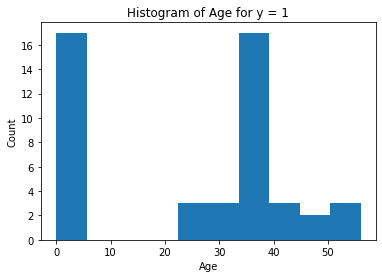

In [ ]:



chosen_value =1
subset_df = df1_and_pm[df1_and_pm['winner'] == chosen_value]

plt.hist(subset_df['age_1'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age for y = ' + str(chosen_value))
plt.show()


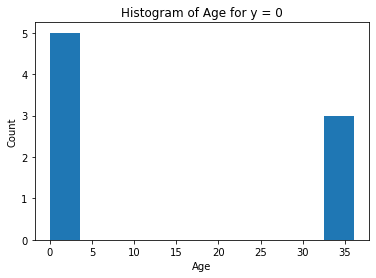

In [ ]:



chosen_value =0
subset_df = df1_and_pm[df1_and_pm['winner'] == chosen_value]

plt.hist(subset_df['age_1'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age for y = ' + str(chosen_value))
plt.show()


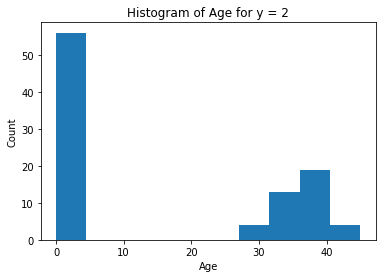

In [ ]:

chosen_value =2
subset_df = df1_and_pm[df1_and_pm['winner'] == chosen_value]

plt.hist(subset_df['age_1'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age for y = ' + str(chosen_value))
plt.show()

KEEP THE LABELS

In [ ]:
winner_2 = df1_and_pm.pop('winner')


REMOVE ALL THE COLUMNS  WITH CATEGORICAL VALUES

In [ ]:
df1_and_pm=popular_matches.drop(columns=['last_name_1', 'last_name_2', 'opponent_1', 'opponent_2','verdict'])


STANDARDIZE AND SPLIT

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df1_and_pm, winner_2, test_size = 0.3,stratify=winner_2)
scaler = StandardScaler()
scaler.fit(x_train)
X_train=scaler.transform(x_train)
X_test=scaler.transform(x_test)

TUNING(STRATIFIEDKFOLD) AND GRIDSEARCHCV FOR RANDOM_FOREST_CLASSIFIER

In [ ]:





n_folds = 5


skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300,1000],
    'max_depth': [2, 3, 4, 5]
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(rf, param_grid=param_grid, cv=skf, scoring='f1_macro')


X = x_train
y = y_train


grid_search.fit(X, y)


print(f"Best parameters: {grid_search.best_params_}")
print(f"Mean cross-validation f1_macro score: {grid_search.best_score_:.3f}")


Best parameters: {'max_depth': 4, 'n_estimators': 100}
Mean cross-validation f1_macro score: 0.538


TUNING(STRATIFIEDKFOLD) AND GRIDSEARCHCV FOR SVM

In [ ]:



n_folds = 5


skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

svm = SVC(random_state=42)

param_grid = {
    'C': [0.01, 0.1,1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale']
}


grid_search = GridSearchCV(svm, param_grid=param_grid, cv=skf, scoring='f1_macro')


X = x_train
y = y_train


grid_search.fit(X, y)


print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean cross-validation score: {grid_search.best_score_:.3f}")


Best hyperparameters: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
Best mean cross-validation score: 0.496


CHECH IF THE DATA FOLLOWS A GAUSSIAN DISTRIBUTION

In [ ]:


stat, p = shapiro(x_train)

print(f"Test statistic: {stat:.3f}")
print(f"p-value: {p:.3f}")


if p > 0.05:
    print("Data follows a Gaussian distribution")
else:
    print("Data does not follow a Gaussian distribution")

Test statistic: 0.711
p-value: 0.000
Data does not follow a Gaussian distribution


TUNING(STRATIFIEDKFOLD) AND GRIDSEARCHCV FOR DECISION_TREE_CLASSIFIER

In [ ]:



n_folds = 5


skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=skf, scoring='f1_macro')


grid_search.fit(x_train, y_train)


print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean cross-validation score: {grid_search.best_score_:.3f}")


Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best mean cross-validation score: 0.467


TUNING(STRATIFIEDKFOLD) AND GRIDSEARCHCV FOR XGBOOSTCLASSIFIER

In [ ]:


n_folds = 5


skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

xgb = XGBClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200]
}


grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=skf, scoring='f1_macro')


grid_search.fit(x_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean cross-validation score: {grid_search.best_score_:.3f}")


Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 200}
Best mean cross-validation score: 0.564


MODEL:RANDOM_FOREST_CLASSIFIER( PARAMETERS : n_estimators = 100, max_depth = 4)

In [ ]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 4)

model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
errors = abs(y_pred - y_test)
accuracy = accuracy_score(y_test, y_pred)



print("RandomForestClassifier")
print(classification_report(y_test, y_pred))





RandomForestClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.78      0.47      0.58        15
           2       0.76      0.97      0.85        29

    accuracy                           0.76        46
   macro avg       0.51      0.48      0.48        46
weighted avg       0.73      0.76      0.73        46



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBOOST CLASSIFIER(PARAMETERS :max_depth=4, learning_rate=0.5, n_estimators=200)

In [ ]:
model = XGBClassifier(max_depth=4, learning_rate=0.5, n_estimators=200)




model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred_winner = model.predict(x_test)
accuracy = accuracy_score(y_test,  y_pred_winner)


print(" XGBClassifier")
print(classification_report(y_test, y_pred_winner))





 XGBClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      0.67      0.67        15
           2       0.84      0.90      0.87        29

    accuracy                           0.78        46
   macro avg       0.50      0.52      0.51        46
weighted avg       0.75      0.78      0.76        46



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DECISION_TREE_CLASSIFIER (max_depth=3,min_samples_leaf=1,min_samples_split=5)

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth=3,min_samples_leaf=1,min_samples_split=5)



tree_classifier.fit(x_train, y_train)

y_pred = tree_classifier.predict(x_test)

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.58      0.93      0.72        15
           2       0.95      0.69      0.80        29

    accuracy                           0.74        46
   macro avg       0.51      0.54      0.51        46
weighted avg       0.79      0.74      0.74        46



SVM PAREMETERS C=0.01 kernel='linear' gamma=0.1

In [ ]:


svm_classifier = SVC(kernel='linear', C=0.01, gamma=0.1)

svm_classifier.fit(x_train, y_train)


y_pred = svm_classifier.predict(x_test)


confusion_mat = confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      0.67      0.69        15
           2       0.83      0.83      0.83        29

    accuracy                           0.74        46
   macro avg       0.51      0.50      0.51        46
weighted avg       0.75      0.74      0.75        46

